# Author: Nitendra Singh Dhaked 

# Part1: Text Data Scraping

In [6]:
import urllib.request
import bs4
import requests

In [7]:
#This Method returns requested url page in decoded format
def _fetchData(url):
    resp = urllib.request.urlopen(url) #Opens the connection for provided url and returns the byte object
    page = resp.read().decode("utf-8") #decode the byte object in utf format or we can also pass the decoding format ex. "utf-8"
    return page

In [8]:
#This method returns all link of provided page
def _page_link_Scraper(html):
    bs_parser = bs4.BeautifulSoup(html,"html.parser") #Parse the html Page and generate the structure for all tags present in page
    page_links=set()
    for link in bs_parser.findAll('a'):  #get all anchor tag from page
        link=link.get('href') #get link from anchor tag
        if(link!=""):  #if url is balank do not add in list
            page_links.add(base_URL+link) #All url is added to link
    return page_links

In [9]:
#generate all the link of base url
def _gen_link(base_url):
    decoded_html=_fetchData(base_url)  #call _fetchdata method which returns the decoded page in utf format
    links_list=_page_link_Scraper(decoded_html) #Page link scraper method returns the list of all links in single page
    return links_list

In [10]:
def _get_body(url):
    html_page=_fetchData(url)
    bs_parser = bs4.BeautifulSoup(html_page,"html.parser") #Parse the html Page and generate the structure for all tags present in page
    for match in bs_parser.find_all("div", { "class" : "main" }):
        text = match.get_text()
    return text

In [11]:
#Base URL or page
base_URL="http://mlg.ucd.ie/modules/COMP41680/news/"

page_set=_gen_link(base_URL) #This method returns all unique Link which is present in base url

cweb_set=set() #set data structure is created to store unique element

#All index link is traversed and all unique link is  updated to cweb_set data sructure
for link in page_set:
    cweb_set.update(_gen_link(link)) #Add all articles link for single month
page_set=page_set.union(cweb_set) #complete links of website

#iterate all the links which contains article
for link in cweb_set:
    _file = open(link.split("/")[-1][:-5],'w') #link is splitted and only article name is take as 
    _file.write(_get_body(link))
    _file.close()

# Part2 Corpus Exploration 

1. Load the text corpus generated in Part 1. Apply any appropriate pre-processing
steps and construct a document-term matrix representation of the corpus.

In [12]:
import glob #find the all path names with matching a specified pattern
all_documents=[] #List is created to store all documents
document_name=[]
for filename in glob.glob('*'): #include all the files from current directory
    if(filename.startswith("article")): #select 1131 documents starts with prefix article 
        fin = open(filename,"r")  #open the file for reading
        document_name.append(filename) #document name for future reference
        all_documents.append(fin.read()) #read full content of file and added to the client
        fin.close() #close the file
print("Number of text documents %d" % len(all_documents)) #Total number of documents

Number of text documents 1131


In [13]:
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
# define the function for lemmatization
def lemma_tokenizer(text):
    # use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text)
    # then use NLTK to perform lemmatisation on each token
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens=[]
    for token in tokens:
        if re.search('[a-zA-Z]', token):  # save those which are non-numeric
            lemma_tokens.append(lemmatizer.lemmatize(token))
    return lemma_tokens

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we can pass in the same preprocessing parameters
tf_idfVector = TfidfVectorizer(stop_words="english",min_df = 5,ngram_range=(1,3),tokenizer=lemma_tokenizer)#chosen n-gram of three words. It will produce phrases containing upto three words
tf_idfMatrix= tf_idfVector.fit_transform(all_documents)

  2 Summarise the overall corpus by identifying the most characteristic terms and phrases in the corpus.

In [ ]:
import numpy as np
features = tf_idfVector.get_feature_names()
vocab = tf_idfVector.vocabulary_
#get features array from tf_idf features list
feature_array = np.array(features)
#sorted index for tf_Idf matrix
sorted_Index = np.argsort(tf_idfMatrix.toarray()).flatten()[::-1]
#select top 500 features using sorted index
top_features = feature_array[sorted_Index][:500]
print(top_features)

['euro' 'ecb' 'european' 'draghi' 'policy' 'crisis' 'rate' 'save'
 'monetary' 'periphery' 'imperative' 'bond' 'connolly'
 'ecb president mario' 'government debt' 'euro zone' 'quite' 'politics'
 'economy' 'zone' 'cost' 'bond market' 'prescription' 'pledged'
 'president mario draghi' 'president mario' 'ecb president'
 'competitiveness' 'mario draghi' 'bear' 'understood' 'market' 'really'
 'currency' 'mario' 'brussels' 'totally' 'human' 'inflation' 'given'
 'cutting' 'buying' 'economic' 'outcome' 'political' 'labour' 'banking'
 'country' 'unemployment' 'single' 'debt' 'strong' 'fact' 'little' 'got'
 'president' 'fund' 'referendum' 'cost ha' 'day say' 'home need' 'ha year'
 'correctly' 'imminent' 'ecb target' 'european banking' 'alive' 'low' 'ha'
 'job' 'tone' 'tightening' 'repeat' 'predecessor' 'mere' 'year uk'
 'famously' 'banking wa' 'important' 'rate low' 'uk economy' 'year people'
 'surprisingly' 'desperately' 'europe' 'uk' 'convince' 'complain' 'deeper'
 'high unemployment' 'aggregat

football, game, finance,money,firewall,film studio words indicating towards sports, economy, technology etc.

# Elbow method to find the best k for K-Means

In [18]:
#reduce the within cluster sum square for finding best k
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
#The best cluster in range of 2 to 6
cluster_range = range(2,6) 
#model fit using TF-IDf
km_modelfit= [KMeans(n_clusters=k).fit(tf_idfMatrix) for k in cluster_range]
#Centroids for K means algorithm
centroids = [k.cluster_centers_ for k in km_modelfit] 

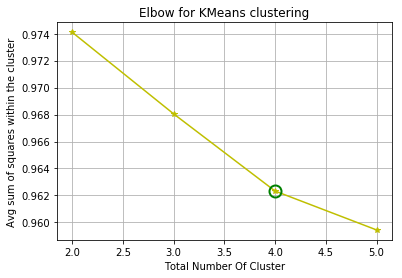

In [34]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
%matplotlib inline

 #cluster distance using euclidian distance
Distance_cluster = [cdist(tf_idfMatrix.toarray(), cent,'euclidean') for cent in centroids] 
euclidian_ditance = [np.min(DC,axis=1) for DC in Distance_cluster] 
#eculidian distance formula
avgSWithInCluster = [sum(distance)/tf_idfMatrix.shape[0] for distance in euclidian_ditance]
k = 2

#plot elbow for k-Means
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot(cluster_range, avgSWithInCluster, 'y*-')
axis.plot(cluster_range[kIdx], avgSWithInCluster[k], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='g', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Total Number Of Cluster')
plt.ylabel('Avg sum of squares within the cluster')
plt.title('Elbow for KMeans clustering')

Best k for K-Means is 4 according to elbow method

3 Apply two alternative clustering algorithms of your choice to the document-term
matrix to produce clusters of related documents. This might require applying
each algorithm several times with different parameter values. 

In [69]:
vocab_lemma = []  #holds lemmetized tokens for all docs
for i in all_documents:
    lemma_tokens = lemma_tokenizer(i)   
    vocab_lemma.extend(lemma_tokens) #Make single list from all documents 
#dataframe of lemmetized tokens. This will get to find most frequent words in a cluster
lemma_vocab = pd.DataFrame({'words': vocab_lemma}, index = vocab_lemma)

# K-Means clustering

In [70]:
import pandas as pd
from sklearn.cluster import KMeans
#generate model for k-means
model = KMeans(4)  
#fit model for tf-Idf Matrix
model.fit(tf_idfMatrix)
#generate clusters labels
clusters = model.labels_.tolist()
#articles grouping
article = {'art': all_documents,'group': clusters}
 #Will be used for cross examination of clusters
cross_tab_frame = pd.DataFrame(article, index = [clusters] , columns = ['group']) 
#all 1131 documents grouped to cluster
print("Cluster Total Documents")
cross_tab_frame['group'].value_counts()

Cluster Total Documents


1    328
3    307
0    264
2    232
Name: group, dtype: int64

In [72]:
print("Top words in cluster")
print()
#sort arguments 
cl_centroid= model.cluster_centers_.argsort()[:, ::-1] 
#Find Top words in all 4 cluster
for i in range(4): #runs for all 4 cluster
    print("Cluster %d :"%i, end='')
    for index in cl_centroid[i, :10]: #top 20 index
        #select the term from lematized vocab
        term=lemma_vocab.ix[features[index].split(' ')].values.tolist()[0][0]
        print(' %s' % term, end=',')
    print()

Top words in cluster

Cluster 0 : club, game, nan, player, wa, goal, arsenal, united, league, cup,
Cluster 1 : cent, nan, tax, bank, irish, said, year, economy, rate, government,
Cluster 2 : hospital, health, nan, child, patient, said, wa, medical, doctor, nan,
Cluster 3 : mobile, phone, said, people, technology, game, user, computer, music, ha,


clustering seprates documents into four different clusters and each of them represents four different areas-sports,economy,health,technology

# Hierarchical Clustering

Hierarchical Clustering is method of cluster analysis which groups data over a variety of scales by creating a cluster tree or dendrogram. The tree is not a single set of clusters, but rather a multilevel of clusters.

Ward Method: This method does not directly define a measure of distance between two points or clusters. It is an ANOVA based approach. At each stage, those two clusters marge, which provides the smallest increase in the combined error sum of squares from one-way univariate ANOVAs that can be done for each variable with groups defined by the clusters at that stage of the process

calulate distance from tfIDf Matrix

In [96]:
from sklearn.metrics.pairwise import cosine_similarity
distance =1-cosine_similarity(tf_idfMatrix) #distance calculation using cosine similarity

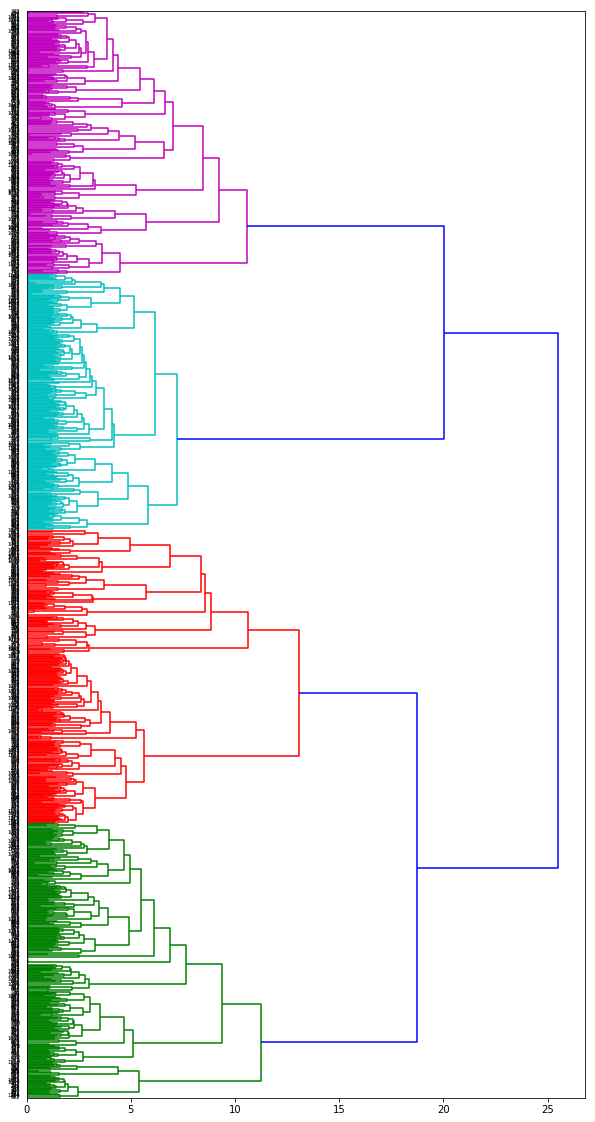

In [98]:
from scipy.cluster.hierarchy import ward,dendrogram
#create linkage matrix using ward method
linkage_matrix = ward(distance)   
#plot the dendogram
fig, axis = plt.subplots(figsize=(10, 20))
ax = dendrogram(linkage_matrix, orientation="right")

Dendogram clearly shows 4 cluster 

In [112]:
import numpy as np
from scipy.cluster.hierarchy import fcluster
# tree cut 
hieCluster = fcluster(linkage_matrix,4,'maxclust')


In [121]:
articles = {'article': all_documents,'cluster': hieCluster}#dictionaries for cluster
article_frame = pd.DataFrame(articles, index = [hieCluster] , columns = ['cluster']) #create frame with group columns
print("Cluster Number of Documents")
article_frame['cluster'].value_counts()

Cluster Number of Documents


2    305
1    286
4    274
3    266
Name: cluster, dtype: int64

# Top 10 frequent words per cluster in Hierarchical Clustering

In [120]:
import pandas as pd
tfIdf_arrayFrame = pd.DataFrame(tf_idfMatrix.toarray()) #create array data frame from TF_IDF Matrix 
tfIdf_arrayFrame['cluster'] = hieCluster #cluster labels
freq_cluster = X.groupby('cluster').sum() #find the total sum in each cluster
cluster_frame=pd.DataFrame({n: freq_cluster.T[col].nlargest(10).index.tolist() 
                  for n, col in enumerate(freq_cluster.T)}).T    
print("Top 10 words in each cluster:")
for i in range(4):
    print("Cluster %d :"%i, end='')
    for ind in df[i::10]: #top 10 words per cluster
        term=vocab_frame.ix[features[cluster_frame.ix[i,ind]].split(' ')].values.tolist()[0][0]
        print(' %s' % term, end=',')
    print()

Top 10 words in each cluster:
Cluster 0 : cent, tax, nan, bank, economy, said, irish, rate, year, government,
Cluster 1 : hospital, health, nan, child, said, patient, wa, medical, doctor, year,
Cluster 2 : game, club, nan, player, wa, goal, arsenal, united, league, ha,
Cluster 3 : mobile, phone, people, said, technology, game, user, music, digital, net,


4 For each clustering generated in Step 3, summarise the contents of the clusters.
Based on your summary, suggest a topic/theme for each cluster.

# Topic/Theme

K-Means and Hierarchical Clustering both method produced 4 clusters and each cluster denotes particular topic.
K-Means cluster Topics:
sports,economy,health,technology
Hierarchical Clustering Topics:
economy,health,sports,digtal technology
Both of the method genrating same topic, so we can say all articles from January to decemeber are related to health, sports, economy and technology.
